#### CNN
- 两阶段目标检测
#### 网络结构
[![xHfJdx.jpg](https://s1.ax1x.com/2022/11/02/xHfJdx.jpg)](https://imgse.com/i/xHfJdx)
#### 特征图
[![xHfYo6.jpg](https://s1.ax1x.com/2022/11/02/xHfYo6.jpg)](https://imgse.com/i/xHfYo6)
#### poling :压缩，下采样
- max-poling:选择区域最大值
- marry-poling：平均采样(少)
[![xH4xd1.jpg](https://s1.ax1x.com/2022/11/02/xH4xd1.jpg)](https://imgse.com/i/xH4xd1)


-黄高 同等映射 何凯明
#### Resnet
[![xHxJvn.jpg](https://s1.ax1x.com/2022/11/02/xHxJvn.jpg)](https://imgse.com/i/xHxJvn)
#### 

In [5]:
import os
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn as nn
from torchvision import transforms,models,datasets
from PIL import Image
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor

##### 数据读取

In [6]:
data_dir = '/home/linzhipeng/dataset/flower_data'

In [7]:
#DataAgumentation数据增强
data_transform = {
    'train' : transforms.Compose([transforms.RandomRotation(45),#随机旋转正负45°
    transforms.CenterCrop(224),#从中心裁剪,随机裁剪
    transforms.RandomHorizontalFlip(p=0.5),#按概率0.5水平垂直翻转
    transforms.RandomVerticalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.2,contrast=0.1,saturation=0.1,hue=0.1),#亮度，对比度，饱和度，色相
    transforms.RandomGrayscale(p=0.025),#概率换成灰度，R=G=B
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225]),#均值方差
    ]),
    'valid': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225]),#训练集和测试集数据预处理方法保持一致
    ]),
}

In [8]:
#构建数据集
batch_size = 9
image_datasets = {x:datasets.ImageFolder(os.path.join(data_dir,x),data_transform[x]) for x in ['train','valid']}
image_datasets

{'train': Dataset ImageFolder
     Number of datapoints: 3306
     Root location: /home/linzhipeng/dataset/flower_data/train
     StandardTransform
 Transform: Compose(
                RandomRotation(degrees=[-45.0, 45.0], interpolation=nearest, expand=False, fill=0)
                CenterCrop(size=(224, 224))
                RandomHorizontalFlip(p=0.5)
                RandomVerticalFlip(p=0.5)
                ColorJitter(brightness=[0.8, 1.2], contrast=[0.9, 1.1], saturation=[0.9, 1.1], hue=[-0.1, 0.1])
                RandomGrayscale(p=0.025)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ),
 'valid': Dataset ImageFolder
     Number of datapoints: 364
     Root location: /home/linzhipeng/dataset/flower_data/valid
     StandardTransform
 Transform: Compose(
                Resize(size=256, interpolation=bilinear, max_size=None, antialias=None)
                CenterCrop(size=(224, 224))
                ToTensor()

In [9]:
dataloaders = {x :torch.utils.data.DataLoader(image_datasets[x],batch_size = batch_size,shuffle=True)for x in ['train','valid']}
data_sizes = {x:len(image_datasets[x])for x in ['train','valid']}
class_name = image_datasets['train'].classes

In [10]:
dataloaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7f02419af430>,
 'valid': <torch.utils.data.dataloader.DataLoader at 0x7f02419af370>}

In [11]:
data_sizes


{'train': 3306, 'valid': 364}

##### 展示数据 
- 展示数据，需要先还原数据
- tensor ->  numpy

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


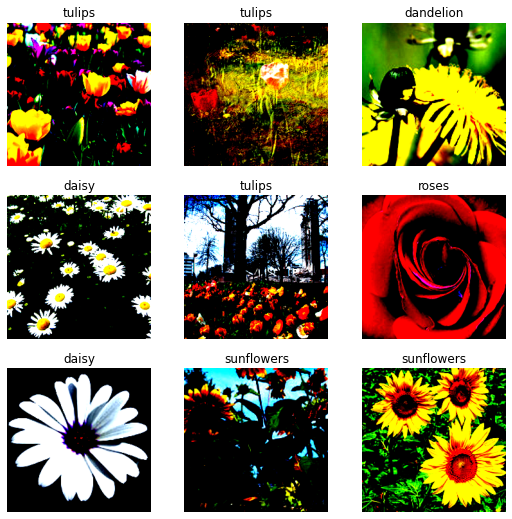

In [12]:

# 随机从训练集中选出图像数据进行展示
labels_map = {
    0: "daisy",
    1: "dandelion",
    2: "roses",
    3: "sunflowers",
    4: "tulips",
}

# 随机从训练集中选出图像数据进行展示
images, labels = next(iter(dataloaders['valid']))
plt.figure(figsize=(9, 9))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.title(labels_map[int(labels[i].item())])
    plt.imshow(images[i].permute(1, 2, 0), cmap='gray')
    plt.axis('off')

In [13]:
#测试gpu是否存在
# import torch
# flag = torch.cuda.is_available()
# print (flag)
# device = torch.device("cuda:0" if flag else "cpu")
# device

In [14]:
#迁移学习
model_ft = models.resnet152()
model_ft

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 